In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\sklearn-models\data\student_performance_lr.csv')
df.head()

,study_hours,attendance_percent,previous_score,sleep_hours,social_media_hours,final_score
0,4,61,75,4,1,75
1,8,86,45,7,6,81
2,6,73,49,7,3,75
3,5,80,89,7,5,80
4,2,96,73,8,2,72


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   study_hours         100 non-null    int64
 1   attendance_percent  100 non-null    int64
 2   previous_score      100 non-null    int64
 3   sleep_hours         100 non-null    int64
 4   social_media_hours  100 non-null    int64
 5   final_score         100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


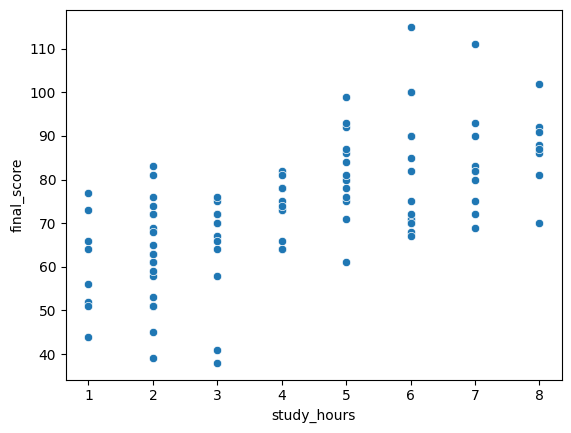

In [72]:
sns.scatterplot(x=df['study_hours'], y=df['final_score'])
plt.show()


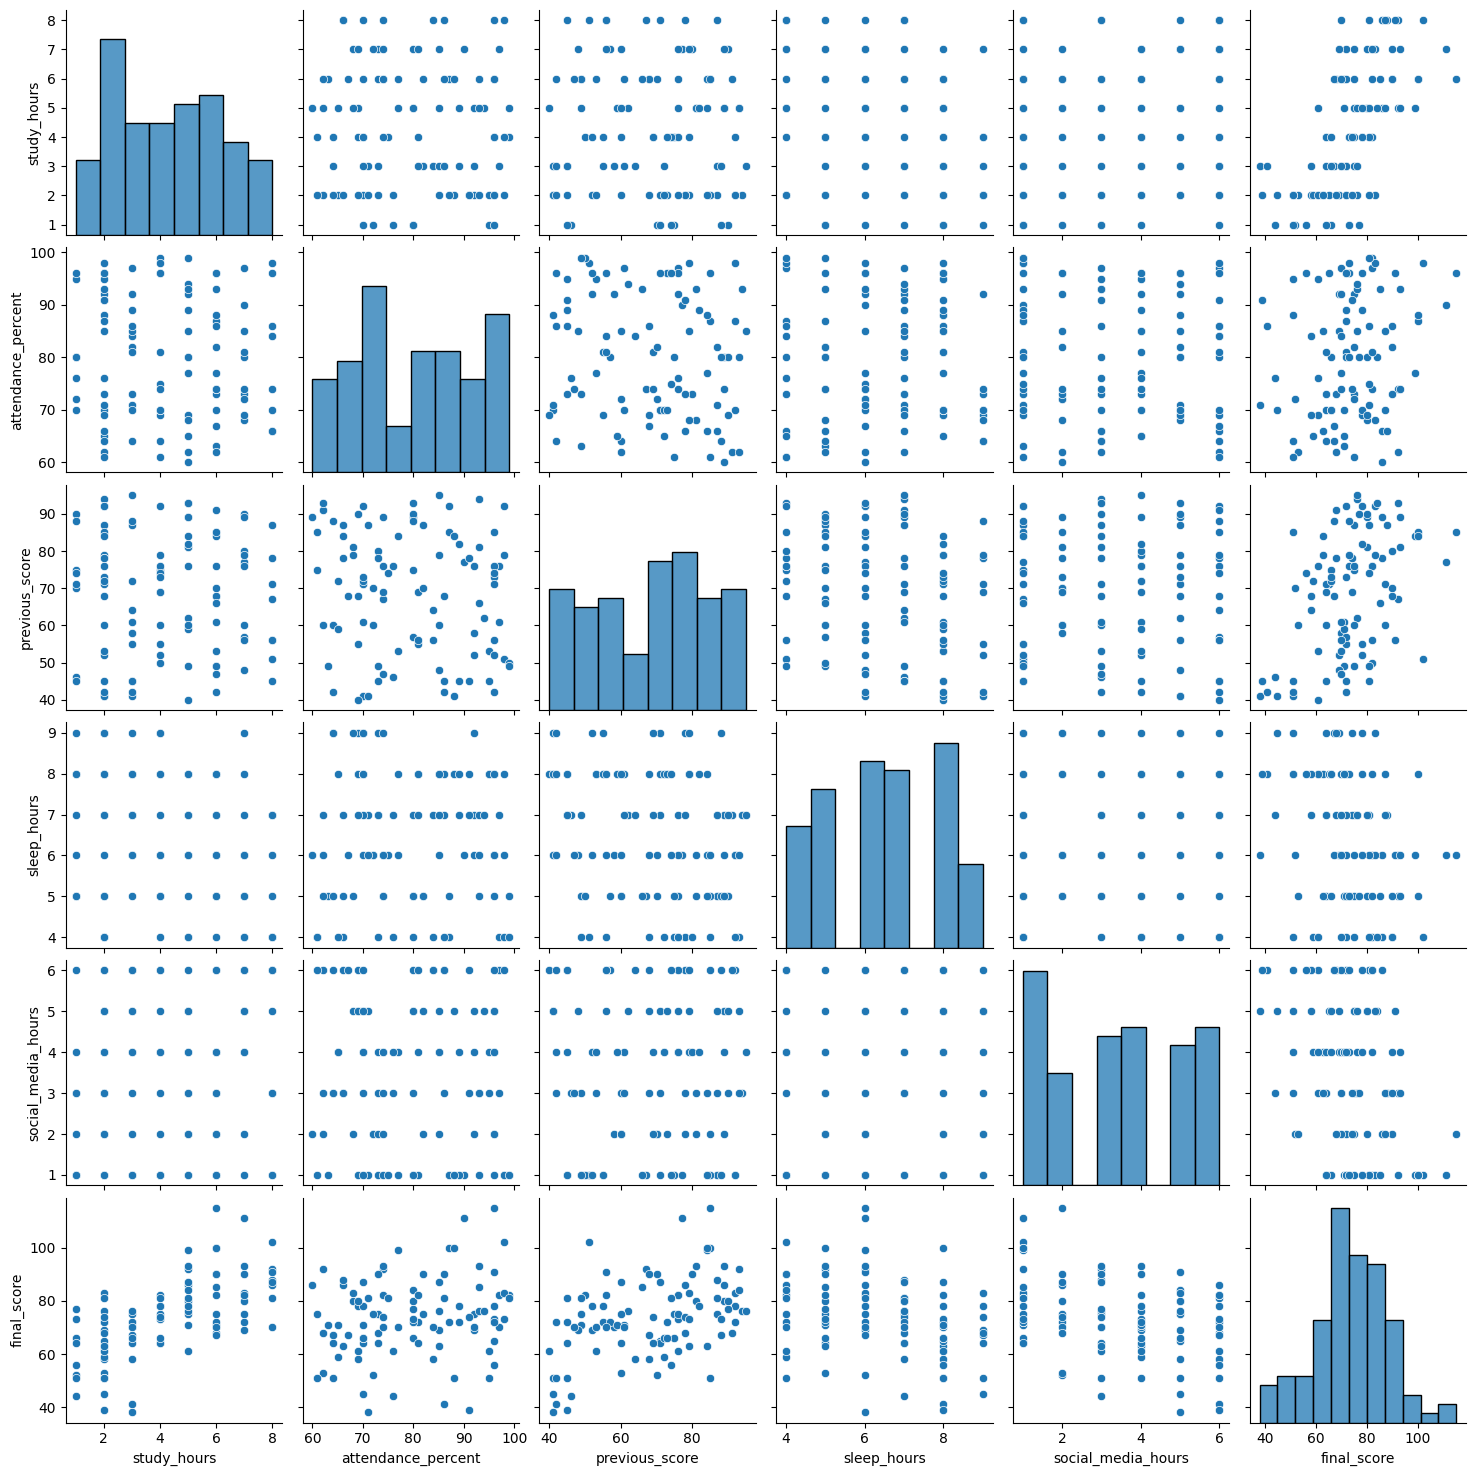

In [73]:
sns.pairplot(df)

In [74]:
X = df[['study_hours','attendance_percent','previous_score','sleep_hours','social_media_hours']].values
y = df['final_score'].values


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
regression = LinearRegression()
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [78]:
mse = cross_val_score(regression, X_train, y_train ,scoring='neg_mean_squared_error', cv=6)
rmse = np.sqrt(-np.mean(mse))
rmse


np.float64(5.387669815774708)

In [79]:
model_prediction = regression.predict(X_test)
model_prediction

array([ 49.73588467,  73.30107536, 100.92602317,  79.14924082,
        45.20740279,  77.81306551,  62.34379868,  93.25698498,
        58.90862003,  75.51746653,  78.72950234,  92.27330966,
        89.97532704,  98.5552611 ,  46.92466464,  75.64461065,
       102.99599658,  60.18140364,  87.58319679,  53.38667266,
        93.59844445,  75.37104877,  80.36147465,  67.03586049,
        78.886626  ,  62.3574489 ,  87.35008674,  86.67097509,
        75.38083893,  72.98910514])

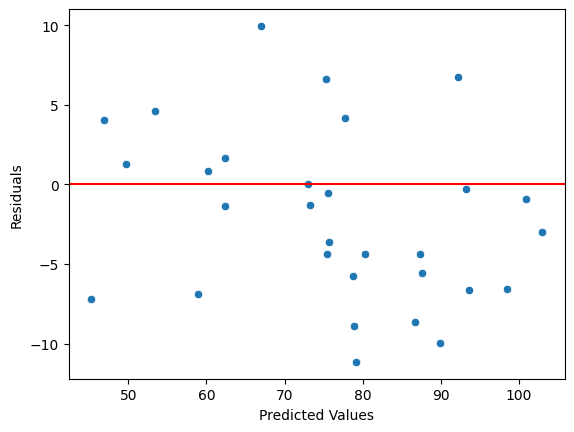

In [80]:
residuals = y_test - model_prediction

sns.scatterplot(x=model_prediction, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [81]:
score = r2_score(y_test, model_prediction)
score


0.8580846120483039

In [82]:
new_data = [[6, 90, 85, 7, 2]]
new_scaler = scaler.transform(new_data)
new_prediton = regression.predict(new_scaler)
print(new_scaler)

[[ 0.86763434  0.89116187  1.10343392  0.26069362 -0.87119691]]


In [83]:
df.head()

,study_hours,attendance_percent,previous_score,sleep_hours,social_media_hours,final_score
0,4,61,75,4,1,75
1,8,86,45,7,6,81
2,6,73,49,7,3,75
3,5,80,89,7,5,80
4,2,96,73,8,2,72


In [84]:
prediction = regression.predict(new_scaler)
print('the student score will be: ', prediction)

the student score will be:  [99.99532214]
